In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
# The load_digits() function loads a dataset of 8x8 pixel images of handwritten digits (0-9)
# Each digit is represented by a small grayscale image and its corresponding label.
digits = load_digits()

In [42]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

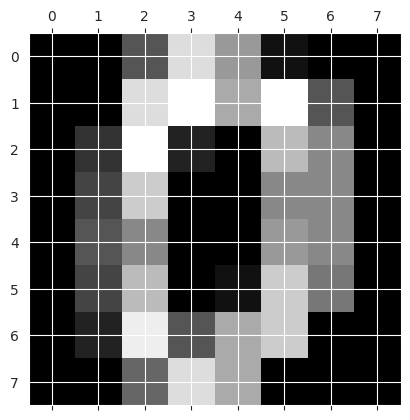

In [65]:
# digits.images[0] is the first image in the dataset.
# plt.matshow visualizes this 8x8 matrix as an image.
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

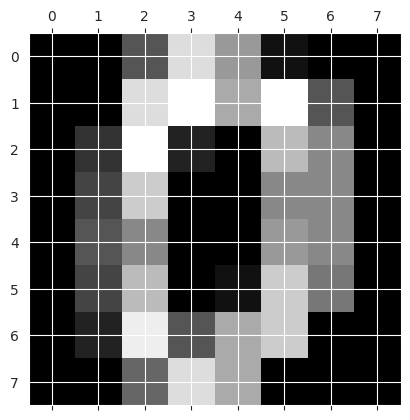

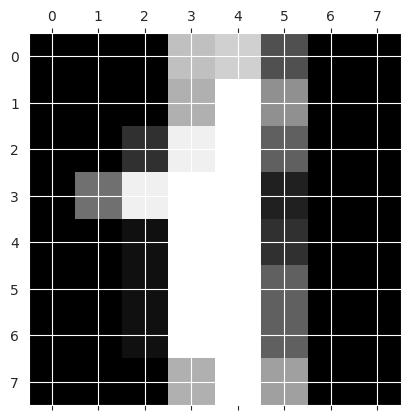

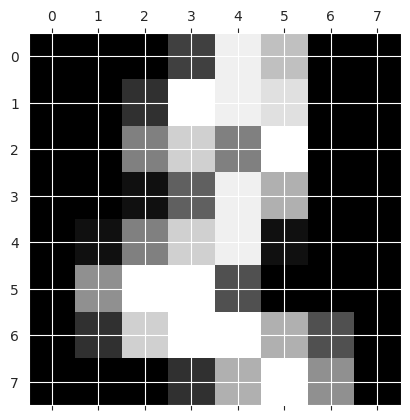

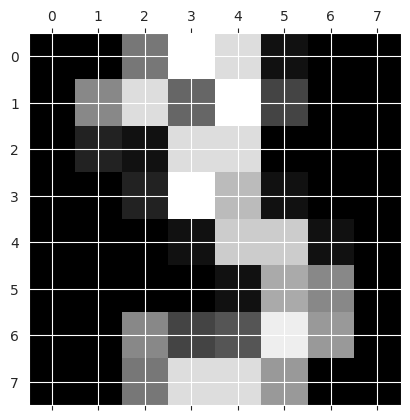

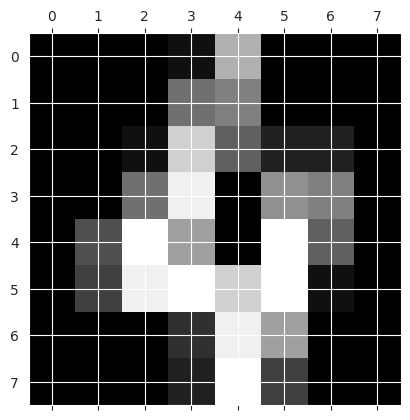

In [66]:
# What is happening here?
#
#     The loop iterates over the first 5 images in the dataset and visualizes them as grayscale images.
#     Why?
#         To understand the nature of the data, it's useful to visualize some sample inputs.
# plt.gray()
# for i in range(5):  # Looking at first 5 digits
#     plt.figure(figsize=(2,2))
#     plt.imshow(digits.images[i], cmap='gray')  # Show the image
#     print(f"Image {i}:")
#     print(f"Label (actual number): {digits.target[i]}")
#     print(f"Pixel values (flattened 8x8 array):\n{digits.data[i][:10]}...")  # Showing first 10 pixel values
#     print("\n")
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [63]:
# digits.target contains the actual labels (0-9) for each image in the dataset.
# digits.target[:5] retrieves the first 5 labels.
# digits.target[:10]

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.2)
len(x_train)
len(x_test)
model.fit(x_train, y_train)

/home/mind/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
# Let's test with one example
print(x_train[0])
test_prediction = model.predict([x_test[0]])

plt.gray()
plt.matshow(x_test[0])

print(f"The computer thinks this picture is number: {test_prediction}")
print(f"The actual number was: {y_test[0]}")
y_predicted = model.predict(x_test)

model.score(x_test, y_test)

[ 0.  0.  0. 11.  9.  0.  0.  0.  0.  0.  0. 11. 14.  0.  0.  0.  0.  0.
  0. 11. 13.  0.  0.  0.  0.  0.  0. 15. 13.  0.  0.  0.  0.  0.  0. 13.
 13.  0.  0.  0.  0.  0.  0. 13.  9.  0.  0.  0.  0.  0.  0. 10. 10.  0.
  0.  0.  0.  0.  0.  9. 11.  0.  0.  0.]


ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 640x480 with 0 Axes>

Let's look at image #0:
digits.target[0] = 0

Let's look at image #1:
digits.target[1] = 1


0.9722222222222222

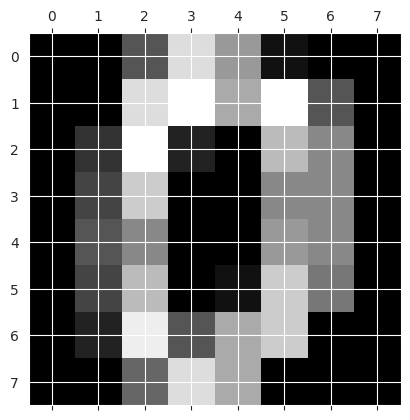

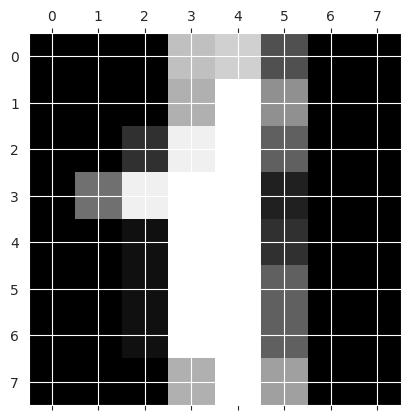

In [91]:
# Let's look at one specific example
print("Let's look at image #0:")
plt.matshow(digits.images[0])  # Shows the first photo
print(f"digits.target[0] = {digits.target[0]}")  # Shows what number this actually is

print("\nLet's look at image #1:")
plt.matshow(digits.images[1])  # Shows the second photo
print(f"digits.target[1] = {digits.target[1]}")
# Shows what number this actually is


0.9666666666666667

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  1, 32]])

Text(95.72222222222221, 0.5, 'Truth')

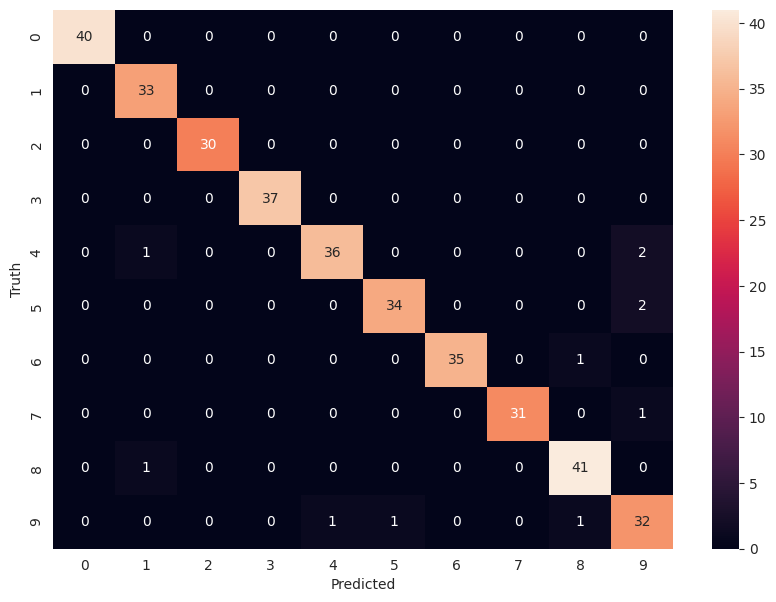

In [93]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')